# Changing cwd

In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('C:\\Users\\Usuario\\TFG\\digipanca\\')

# Checking window level

## Imports and functions

In [5]:
import numpy as np
import nibabel as nib
import torch
import matplotlib.pyplot as plt

In [43]:
def apply_window(image, window_level, window_width):
    """ Adjust the window level and window width for better visualization. """
    print(image)
    min_val = window_level - (window_width / 2)
    max_val = window_level + (window_width / 2)
    print(f"Min val: {min_val} | Max val: {max_val}")
    windowed_image = np.clip(image, min_val, max_val)
    print(windowed_image)
    return (windowed_image - min_val) / (max_val - min_val)

In [31]:
def vis(image, wimg):
    image = np.array(image.squeeze())
    wimg = np.array(wimg.squeeze())

    # Calcular la diferencia entre imágenes
    diff = np.abs(image - wimg)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # 1. Imagen CT original
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('CT Normal Image')
    axes[0].axis('off')
    
    # 2. Imagen CT con ventana aplicada
    axes[1].imshow(wimg, cmap='gray')
    axes[1].set_title('CT Windowed Image')
    axes[1].axis('off')

    # 3. Diferencia entre ambas imágenes
    axes[2].imshow(diff, cmap='hot')  # 'hot' para destacar diferencias
    axes[2].set_title('Difference (Original - Windowed)')
    axes[2].axis('off')

    plt.show()

    # Cálculos de diferencia
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    max_diff = np.max(diff)

    print(f'Difference Analysis:')
    print(f'  - Mean difference: {mean_diff:.4f}')
    print(f'  - Standard deviation: {std_diff:.4f}')
    print(f'  - Max difference: {max_diff:.4f}')

## Loading data and processing

In [32]:
path = 'data/raw/rtum35/SEQ/CTport-rtum35.nii'
image_nii = nib.load(path).get_fdata()
print(image_nii.shape)
img_slice = image_nii[:, :, 26]

(512, 512, 55)


In [33]:
im2 = img_slice.copy()
wimg = apply_window(im2, 50, 400)

[[-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 ...
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]]
Min val img: -1024.0 | Max val img: 1241.0
Min val: -150.0 | Max val: 250.0
[[-150. -150. -150. ... -150. -150. -150.]
 [-150. -150. -150. ... -150. -150. -150.]
 [-150. -150. -150. ... -150. -150. -150.]
 ...
 [-150. -150. -150. ... -150. -150. -150.]
 [-150. -150. -150. ... -150. -150. -150.]
 [-150. -150. -150. ... -150. -150. -150.]]


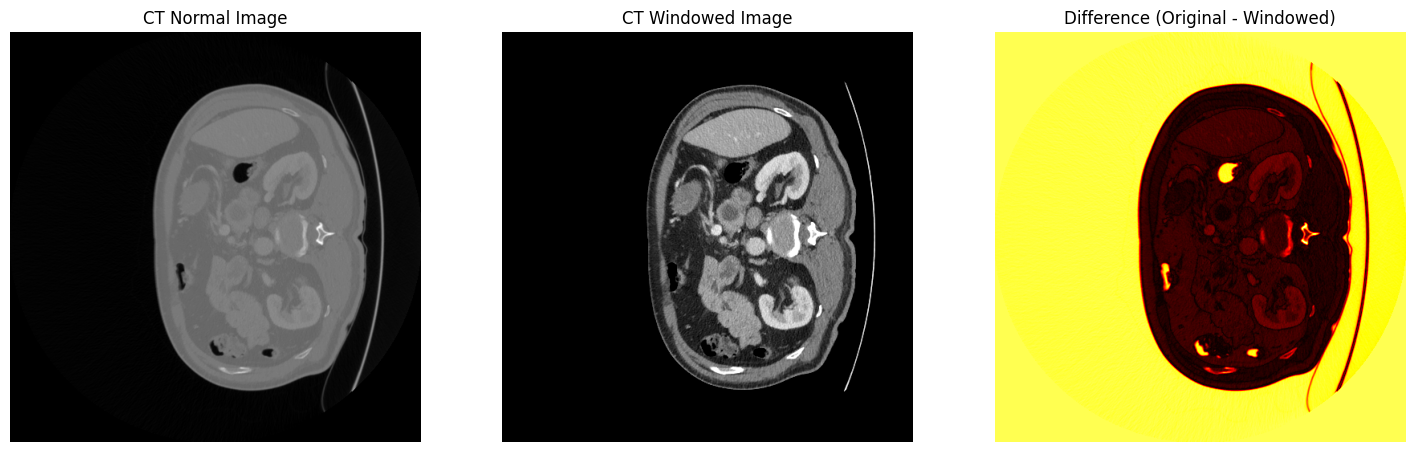

Difference Analysis:
  - Mean difference: 699.1952
  - Standard deviation: 430.9635
  - Max difference: 1240.0000


In [34]:
vis(img_slice, wimg)

In [23]:
print(img_slice)

[[-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 ...
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]]


# Testing with Dataset

In [49]:
from src.data import PancreasDataset
from src.utils.config import load_config
from src.data.transforms import standard_transforms

In [50]:
config = load_config()
RAW_DIR = config['data']['raw_dir']
sample_dirs = [os.path.join(RAW_DIR, sd) for sd in os.listdir(RAW_DIR)]
ds = PancreasDataset(
    sample_dirs=sample_dirs,
    split_path='data/splits/one.json',
    split_type='train',
    transform=standard_transforms
)

📊 Loading dataset (train)... 1 patients found.
📊 Dataset loaded with 55 slices.


tensor([[[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
         ...,
         [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]]])
Min val: -150.0 | Max val: 250.0
tensor([[[-150., -150., -150.,  ..., -150., -150., -150.],
         [-150., -150., -150.,  ..., -150., -150., -150.],
         [-150., -150., -150.,  ..., -150., -150., -150.],
         ...,
         [-150., -150., -150.,  ..., -150., -150., -150.],
         [-150., -150., -150.,  ..., -150., -150., -150.],
         [-150., -150., -150.,  ..., -150., -150., -150.]]])


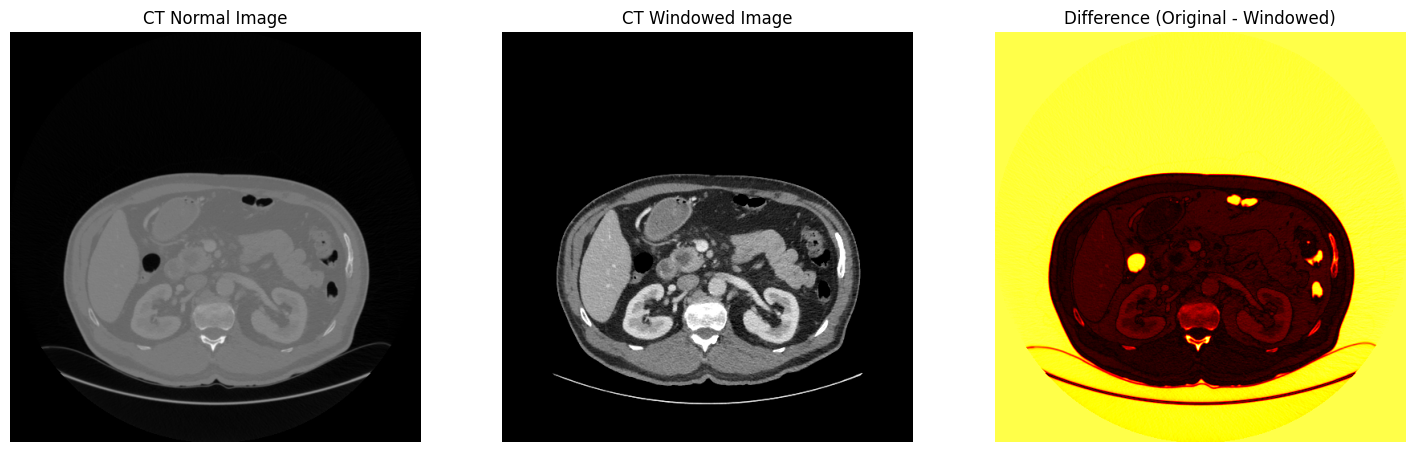

Difference Analysis:
  - Mean difference: 699.1257
  - Standard deviation: 429.9080
  - Max difference: 1249.0000


In [47]:
normal_img, _, _ = ds[28]
# wni = np.array(normal_img)
wni = apply_window(normal_img, 50, 400)
vis(normal_img, wni)